<a href="https://colab.research.google.com/github/jitendra986/100-Days-of-Deep-Learning/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:29<00:00, 40.4MB/s]
100% 1.06G/1.06G [00:29<00:00, 39.0MB/s]


In [8]:
# to unzip the the stored zipped data runthis command
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D, Flatten


In [10]:
train_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/dogs_vs_cats/train',
    labels="inferred",
    label_mode="int",#cat assign 0 and dogs would be assigned 1
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/dogs_vs_cats/test',
    labels="inferred",
    label_mode="int",#cat assign 0 and dogs would be assigned 1
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)
# after running this cell all the images are going to store as numpy array

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
# Normalize, since all the images ahave different pixel size hence Normalization is needed here.

def process(image, label):
  image = tf.cast(image/255. , tf.float32)

  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
# create CNN Model

model = Sequential()
#32 filter with size 3X3
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

#64 filter with size 3X3
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

#128 filter with size 3X3
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
# total number of batchs = total training data/batch_size = 20000/32 = 625

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 128)     

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history= model.fit(train_ds, epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 99ms/step - loss: 0.6109 - accuracy: 0.6614 - val_loss: 0.5533 - val_accuracy: 0.7028
Epoch 2/10
625/625 [==============================] - 70s 112ms/step - loss: 0.4628 - accuracy: 0.7814 - val_loss: 0.4267 - val_accuracy: 0.8082
Epoch 3/10
625/625 [==============================] - 58s 92ms/step - loss: 0.3543 - accuracy: 0.8408 - val_loss: 0.4484 - val_accuracy: 0.8036
Epoch 4/10
625/625 [==============================] - 55s 88ms/step - loss: 0.2266 - accuracy: 0.9045 - val_loss: 0.7036 - val_accuracy: 0.7966
Epoch 5/10
625/625 [==============================] - 61s 97ms/step - loss: 0.1342 - accuracy: 0.9498 - val_loss: 0.8290 - val_accuracy: 0.7856
Epoch 6/10
625/625 [==============================] - 59s 93ms/step - loss: 0.0717 - accuracy: 0.9739 - val_loss: 1.0525 - val_accuracy: 0.7920
Epoch 7/10
625/625 [==============================] - 62s 99ms/step - loss: 0.0575 - accuracy: 0.9800 - val_loss: 1.1965 - val_accuracy

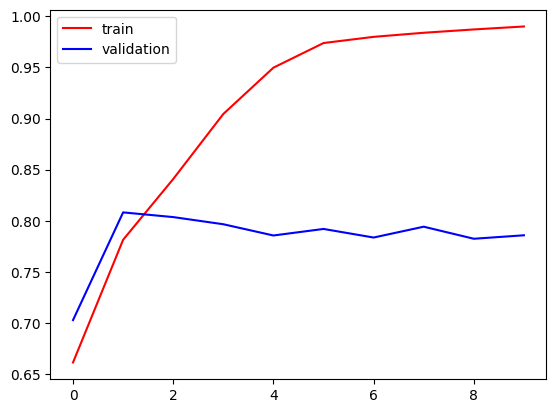

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red',label='train')
plt.plot(history.history['val_accuracy'], color='blue',label='validation')
plt.legend()
plt.show()

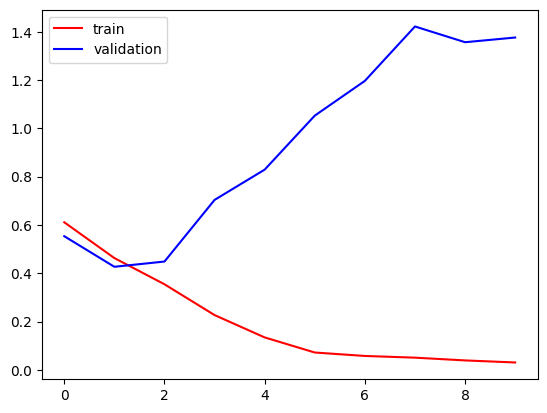

In [23]:
plt.plot(history.history['loss'], color='red',label='train')
plt.plot(history.history['val_loss'], color='blue',label='validation')
plt.legend()
plt.show()
#this is a case of over fitting

In [24]:
#Ways to reduce overfitting

#Add more data
#Data Augementation
#L1/L2 Regularizer
#Dropout
#Batch Norm
#Reduce Complexity

# Approch to reduce overfitting in Keras

In [25]:

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D, Flatten, BatchNormalization, Dropout


In [26]:
train_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/dogs_vs_cats/train',
    labels="inferred",
    label_mode="int",#cat assign 0 and dogs would be assigned 1
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/dogs_vs_cats/test',
    labels="inferred",
    label_mode="int",#cat assign 0 and dogs would be assigned 1
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)
# after running this cell all the images are going to store as numpy array

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [27]:
# Normalize, since all the images ahave different pixel size hence Normalization is needed here.

def process(image, label):
  image = tf.cast(image/255. , tf.float32)

  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [29]:
# create CNN Model

model = Sequential()
#32 filter with size 3X3
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

#64 filter with size 3X3
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

#128 filter with size 3X3
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
# total number of batchs = total training data/batch_size = 20000/32 = 625

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
history= model.fit(train_ds, epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 109ms/step - loss: 1.1654 - accuracy: 0.5871 - val_loss: 0.6147 - val_accuracy: 0.6478
Epoch 2/10
625/625 [==============================] - 66s 106ms/step - loss: 0.5662 - accuracy: 0.7099 - val_loss: 0.6162 - val_accuracy: 0.6544
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4880 - accuracy: 0.7711 - val_loss: 0.4953 - val_accuracy: 0.7638
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4263 - accuracy: 0.8064 - val_loss: 0.5280 - val_accuracy: 0.7338
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3698 - accuracy: 0.8357 - val_loss: 0.4452 - val_accuracy: 0.7966
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3022 - accuracy: 0.8705 - val_loss: 0.4830 - val_accuracy: 0.8030
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2355 - accuracy: 0.9029 - val_loss: 0.7875 - val_ac

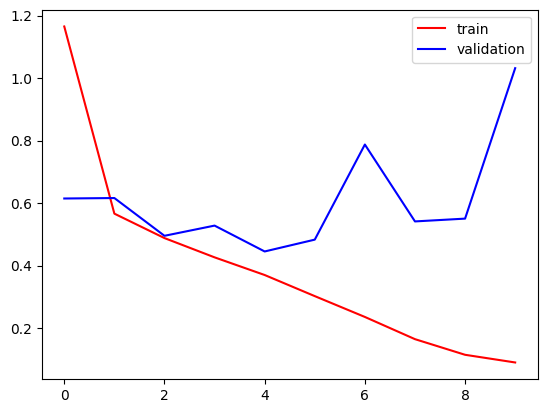

In [34]:
plt.plot(history.history['loss'], color='red',label='train')
plt.plot(history.history['val_loss'], color='blue',label='validation')
plt.legend()
plt.show()
#this is a case of over fitting

In [35]:
import cv2

In [43]:
test_img = cv2.imread('/content/cat.jpg')

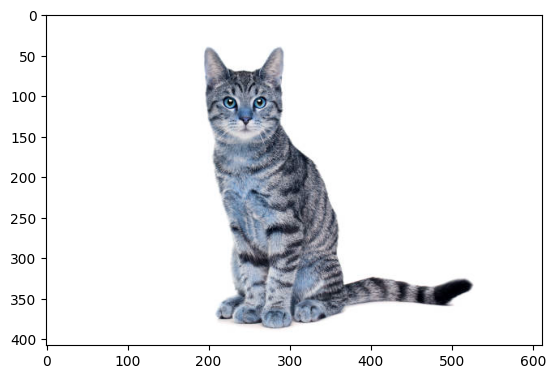

In [44]:
plt.imshow(test_img)

In [45]:
test_img.shape

(408, 612, 3)

In [46]:
#resize the image of size 256X256X3 because I trained the model with this size

test_img = cv2.resize(test_img,(256,256))

In [47]:
test_input = test_img.reshape((1,256,256,3))

In [48]:
model.predict(test_input)
#model is prefectly predicting the cat and dog images

1/1 [==============================] - 0s 31ms/step


array([[0.]], dtype=float32)